# **Laboratorio 5: Codigos de las señales EEG con Ultracortex Mark IV**

## 1. Importar Librerias

In [13]:
pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.0 MB/s eta 0:00:00


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

## 2. Extracción de datos

Extraemos la data principal de nuestro dataframe, por ejemplo frecuencia de muestreo, numero de columnas (canales), numero de filas (muestras en el tiempo), nombre de las columnas y data en general.

In [38]:
import pandas as pd
import numpy as np
import mne

# === 1. CARGAR ARCHIVO ===
path = r"/content/OpenBCI-RAW-2025-09-17_12-45-51.txt"
df = pd.read_csv(path, sep=",", comment="%", engine="python")

# === 2. LIMPIAR COLUMNAS ===
df.columns = df.columns.str.strip()  # elimina espacios
print(f"{df.shape[0]} filas x {df.shape[1]} columnas")
print(df.columns.tolist())

# === 3. CALCULAR FRECUENCIA DE MUESTREO ===
t = df["Timestamp"].values
dt = np.diff(t).mean()
fs_estimada = 1.0 / dt
print(f"Frecuencia de muestreo estimada: {fs_estimada:.2f} Hz")

# Usamos la frecuencia nominal de OpenBCI (Cyton)
fs = 250.0

# === 4. SELECCIONAR CANALES EEG ===
eeg_cols = [col for col in df.columns if col.startswith("EXG Channel")]
print("Canales EEG:", eeg_cols)

# Extraer datos y transponer a (n_channels, n_times)
data = df[eeg_cols].values.T
print("Forma del array de datos:", data.shape)  # (8, n_muestras)

# === 5. CREAR INFO PARA MNE ===
ch_names = eeg_cols
ch_types = ["eeg"] * len(ch_names)
info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=ch_types)

# === 6. CREAR OBJETO RAW ===
raw = mne.io.RawArray(data, info)
print(raw)

# === 7. RENOMBRAR CANALES A NOMENCLATURA ESTÁNDAR ===
# Correspondencia típica de OpenBCI Cyton 8ch → Sistema 10-20
rename_map = {
    "EXG Channel 0": "Fp1",
    "EXG Channel 1": "Fp2",
    "EXG Channel 2": "C3",
    "EXG Channel 3": "C4",
    "EXG Channel 4": "P7",
    "EXG Channel 5": "P8",
    "EXG Channel 6": "O1",
    "EXG Channel 7": "O2",
}

raw.rename_channels(rename_map)
print("Canales renombrados:", raw.ch_names)

# === 8. APLICAR MONTAGE ESTÁNDAR ===
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage)
print("Montaje asignado correctamente.")


180227 filas x 25 columnas
['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Not Used', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Not Used.1', 'Digital Channel 4 (D18)', 'Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2', 'Timestamp', 'Marker Channel', 'Timestamp (Formatted)']
Frecuencia de muestreo estimada: 246.73 Hz
Canales EEG: ['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7']
Forma del array de datos: (8, 180227)
Creating RawArray with float64 data, n_channels=8, n_times=180227
    Range : 0 ... 180226 =      0.000 ...   720.904 secs
Ready.
<RawArray | 8 x 180227 (720.9 s), ~11.0 MiB, data loaded>
Canales renombrados: ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', '

# 3. Información y visulización basica


In [39]:
#Información de la señal
raw.info


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, P7, P8, O1, O2
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


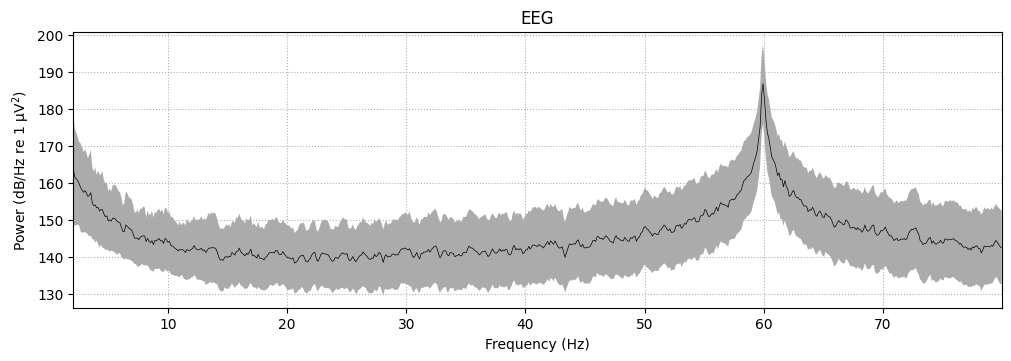

In [40]:
raw.plot_psd(tmin=0, tmax=None, fmin=2, fmax=80, average=True, spatial_colors=False);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



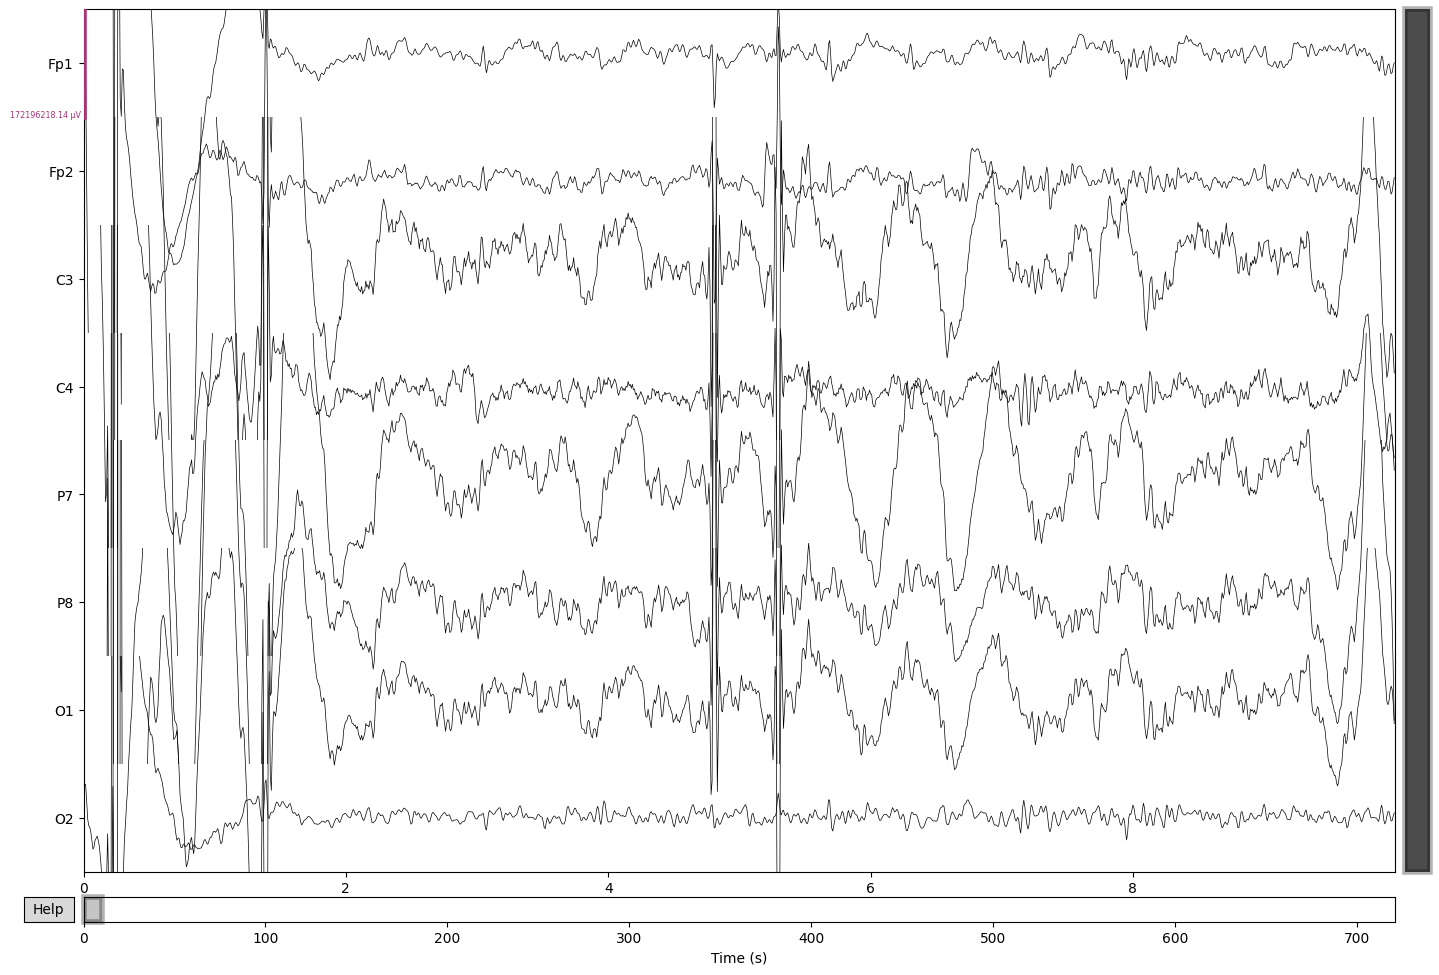

In [41]:
#Ploteo de la señal
raw.filter(l_freq=1, h_freq=30, method='iir')
raw.notch_filter(freqs=50)

fig = raw.plot(scalings='auto', show=False)
fig.set_size_inches(15, 10)
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


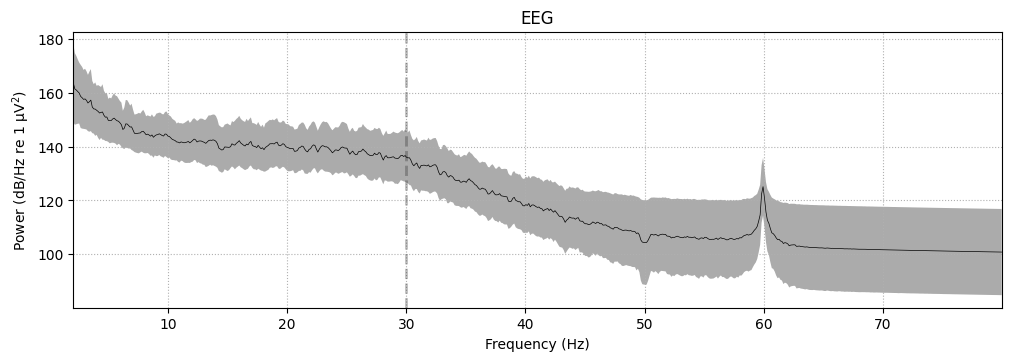

In [42]:
raw.plot_psd(tmin=0, tmax=None, fmin=2, fmax=80, average=True, spatial_colors=False);


=== Visualización de datos Evoked ===
<Evoked | '' (average, N=1), 2 – 7.996 s, baseline off, 8 ch, ~109 KiB>
Forma de evoked.data: (8, 1500)
Canales: ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']
Duración del segmento: 6 s


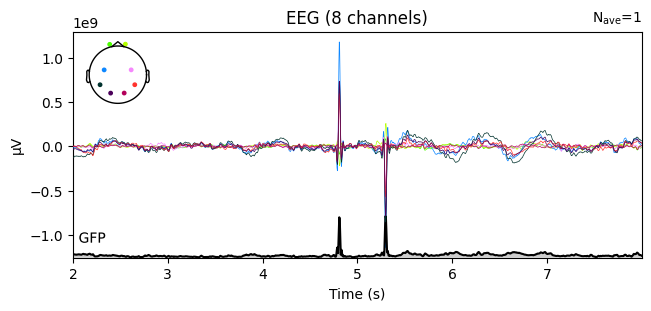

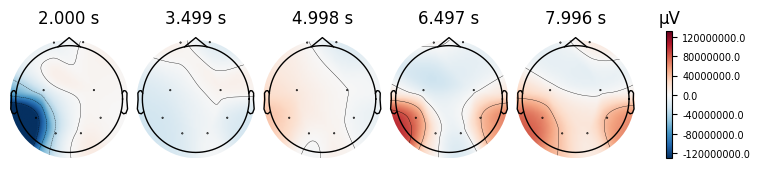

No projector specified for this dataset. Please consider the method self.add_proj.


<Figure size 640x480 with 0 Axes>

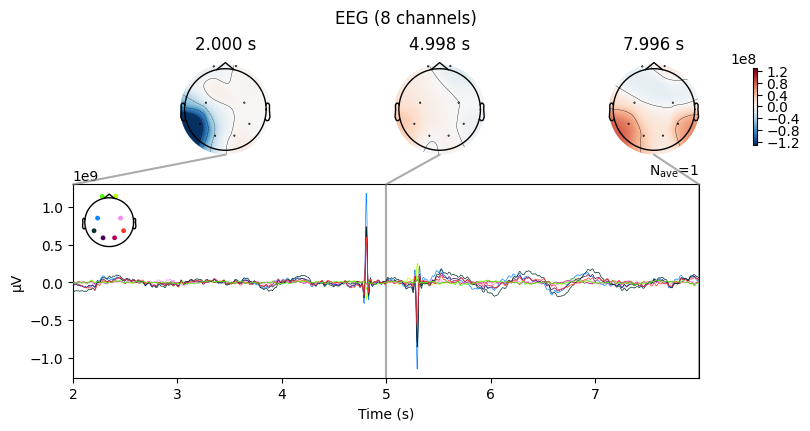

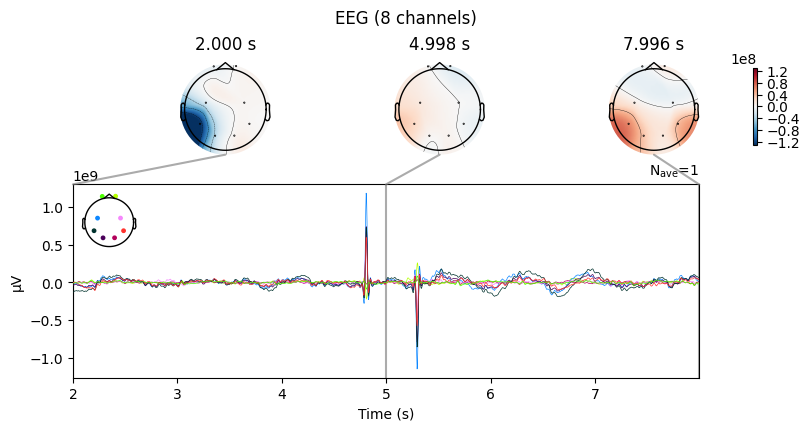

In [60]:
# === CONFIGURACIÓN DE SEGMENTO ===
sfreq = raw.info["sfreq"]          # Frecuencia de muestreo
start_time = 2                     # segundos
end_time = 8                       # segundos

# Convertir a muestras
start_sample = int(start_time * sfreq)
end_sample = int(end_time * sfreq)

# Extraer datos entre 2 y 8 segundos
data_segment = raw.get_data()[:, start_sample:end_sample]  # (n_canales, n_tiempos)

# Crear objeto Evoked (asignando tmin=2 porque el segmento empieza en 2s)
evoked = mne.EvokedArray(data_segment, raw.info, tmin=start_time)

print("\n=== Visualización de datos Evoked ===")
print(evoked)
print("Forma de evoked.data:", evoked.data.shape)
print("Canales:", evoked.ch_names)
print("Duración del segmento:", end_time - start_time, "s")

# === A. Gráfico de las señales promedio ===
evoked.plot(spatial_colors=True, gfp=True, window_title="Señales Evoked (2–8 s)")

# === B. Topografía de potenciales ===
times = np.linspace(evoked.times[0], evoked.times[-1], 5)  # 5 tiempos equidistantes entre 2 y 8 s
evoked.plot_topomap(times=times, ch_type="eeg")
plt.suptitle("Topografía en distintos tiempos (2–8 s)", fontsize=12)

# === C. Gráfico conjunto tiempo–topografía ===
evoked.plot_joint(times=np.linspace(evoked.times[0], evoked.times[-1], 3))


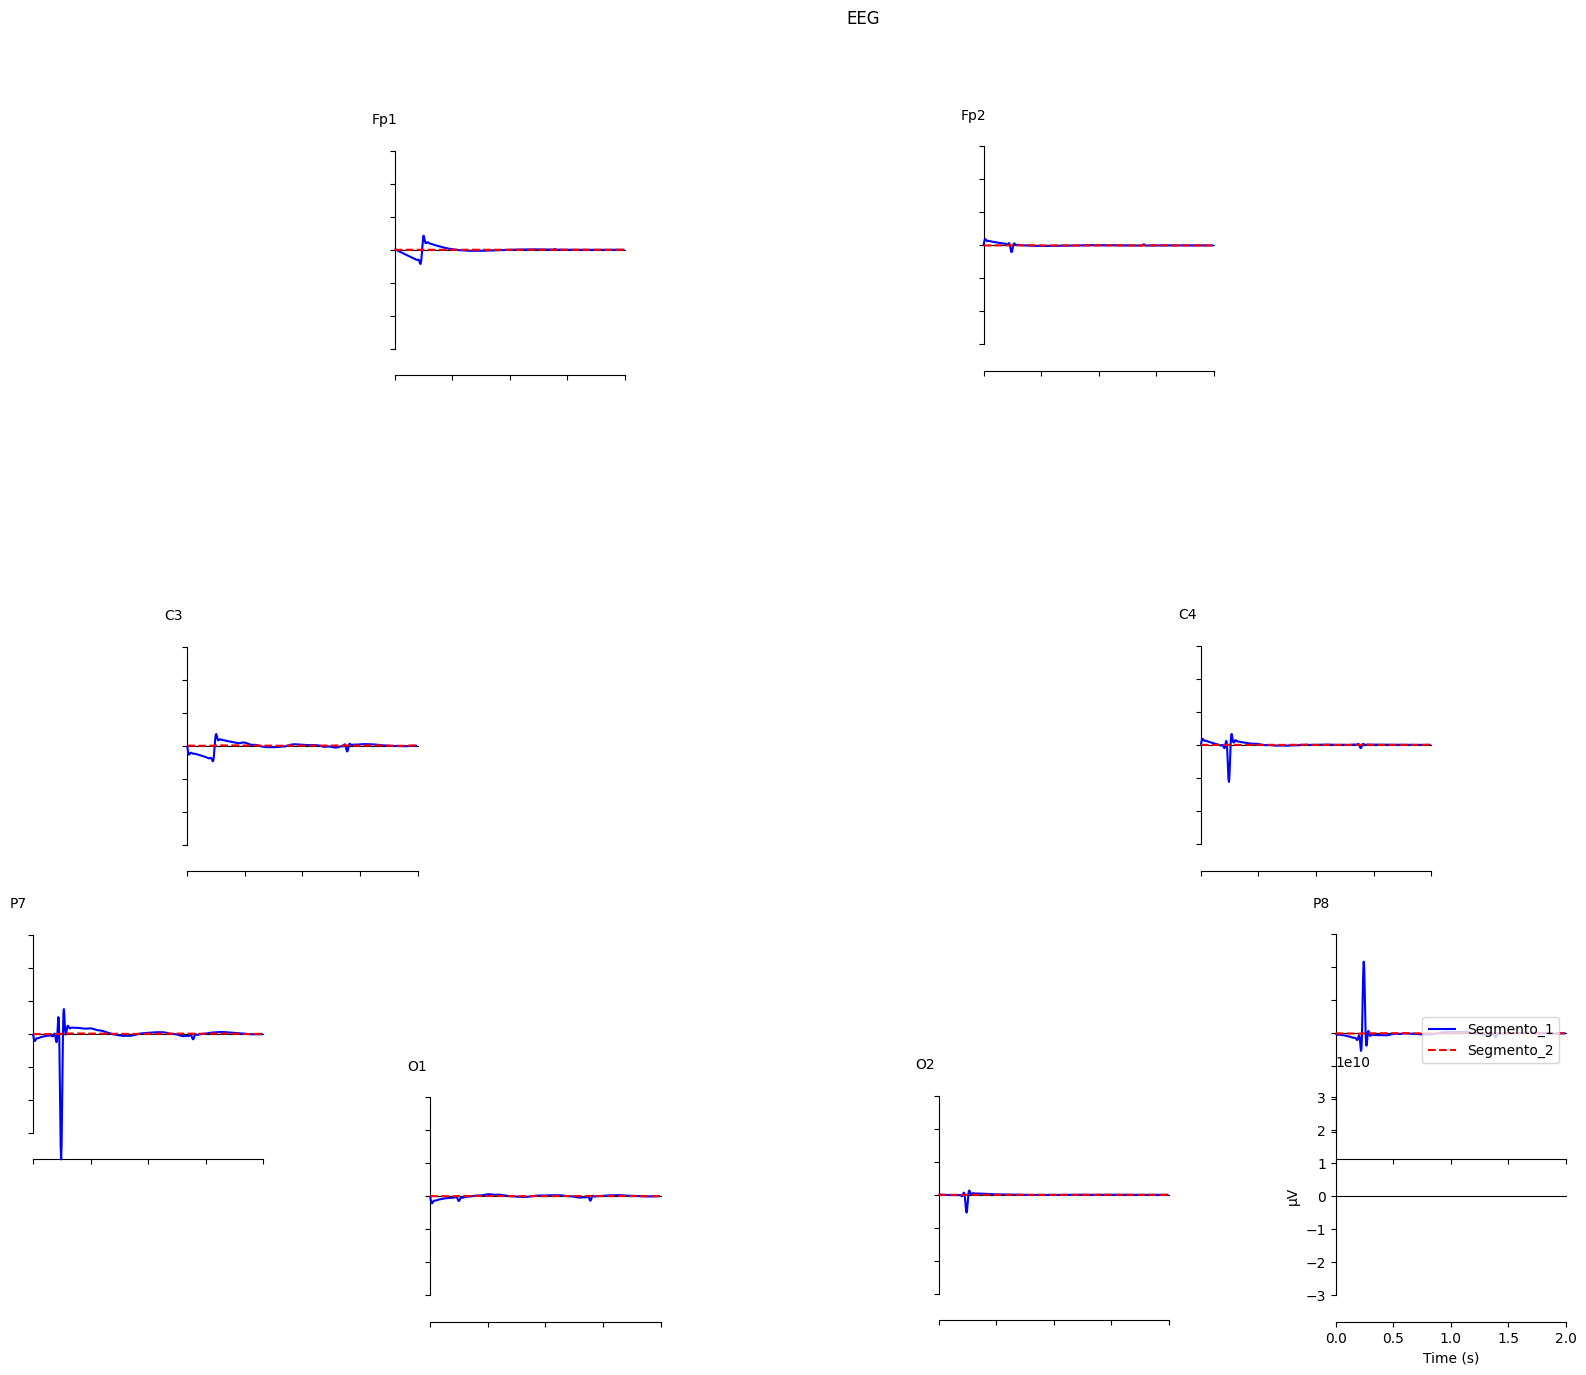

<Figure size 640x480 with 0 Axes>

In [58]:
# === 1. Tomar varios segmentos de tu señal ===
sfreq = raw.info["sfreq"]

# Duración de cada segmento (en segundos)
seg_dur = 2  # 2 segundos por segmento
n_samples = int(seg_dur * sfreq)

# Tomamos dos fragmentos distintos de tu registro
segmento_1 = raw.get_data()[:, :n_samples]          # primeros 2 s
segmento_2 = raw.get_data()[:, n_samples:2*n_samples]  # segundos 2–4 s

# Creamos EvokedArrays para cada uno
evoked_1 = mne.EvokedArray(segmento_1, raw.info, tmin=0, comment="Segmento_1")
evoked_2 = mne.EvokedArray(segmento_2, raw.info, tmin=0, comment="Segmento_2")

# Los guardamos en un diccionario (como espera plot_compare_evokeds)
evks = dict(Segmento_1=evoked_1, Segmento_2=evoked_2)

# === 2. Visualización: Topographical subplots ===
mne.viz.plot_compare_evokeds(
    evks,
    picks="eeg",
    axes="topo",  # organiza los canales según su posición en el cuero cabelludo
    colors=dict(Segmento_1="blue", Segmento_2="red"),
    linestyles=dict(Segmento_1="solid", Segmento_2="dashed"),
    styles=dict(Segmento_1=dict(linewidth=1.5), Segmento_2=dict(linewidth=1.5)),
)

plt.suptitle("Comparación topográfica entre segmentos EEG", fontsize=12)
plt.show()